In [58]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
np.random.seed(10)

In [59]:
filepath="data/pima-indians-diabetes.xls"
all_df=pd.read_excel(filepath)

In [60]:
cols=['Outcome','Pregnancies','Glucose','Blood','Skin','Insulin',
      'BMI','Diabetes', 'Age']
all_df=all_df[cols]

In [61]:
all_df[:5]

,Outcome,Pregnancies,Glucose,Blood,Skin,Insulin,BMI,Diabetes,Age
0,1,6,148,72,35,0,33.6,0.627,50
1,0,1,85,66,29,0,26.6,0.351,31
2,1,8,183,64,0,0,23.3,0.672,32
3,0,1,89,66,23,94,28.1,0.167,21
4,1,0,137,40,35,168,43.1,2.288,33


In [62]:
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [63]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 768 train: 616 test: 152


In [64]:
def PreprocessData(raw_df):
    zero_not_accepted = ['Glucose', 'Blood', 'Skin', 'BMI', 'Insulin']       
    for column in zero_not_accepted: 
        mean = int(raw_df[column].mean(skipna=True))
        raw_df[column].replace(0, mean,inplace=True) 
     
    ndarray = raw_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [65]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

/home/cool/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [66]:
train_Features[:2]

array([[0.35294118, 0.67096774, 0.48979592, 0.30434783, 0.08052885,
        0.31492843, 0.23244863, 0.48333333],
       [0.05882353, 0.26451613, 0.42857143, 0.23913043, 0.08052885,
        0.17177914, 0.11429795, 0.16666667]])

In [67]:
train_Label[:2]

array([1., 0.])

In [68]:
test_Features[:2]

array([[0.76923077, 0.77941176, 0.52380952, 0.23404255, 0.11132075,
        0.62025316, 0.26952437, 0.26530612],
       [0.38461538, 0.76470588, 0.5       , 0.25531915, 0.30188679,
        0.23417722, 0.29888432, 0.6122449 ]])

In [69]:
test_Label[:2]

array([1., 1.])

In [70]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [71]:
model = Sequential()

In [72]:
model.add(Dense(units=30, input_dim=8, 
                kernel_initializer='uniform', 
                activation='relu'))

In [73]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [74]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [75]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 554 samples, validate on 62 samples
Epoch 1/30
 - 1s - loss: 0.6917 - acc: 0.6245 - val_loss: 0.6913 - val_acc: 0.5806
Epoch 2/30
 - 0s - loss: 0.6873 - acc: 0.6534 - val_loss: 0.6892 - val_acc: 0.5806
Epoch 3/30
 - 0s - loss: 0.6810 - acc: 0.6534 - val_loss: 0.6869 - val_acc: 0.5806
Epoch 4/30
 - 0s - loss: 0.6746 - acc: 0.6534 - val_loss: 0.6855 - val_acc: 0.5806
Epoch 5/30
 - 0s - loss: 0.6667 - acc: 0.6534 - val_loss: 0.6839 - val_acc: 0.5806
Epoch 6/30
 - 0s - loss: 0.6624 - acc: 0.6534 - val_loss: 0.6851 - val_acc: 0.5806
Epoch 7/30
 - 0s - loss: 0.6566 - acc: 0.6534 - val_loss: 0.6809 - val_acc: 0.5806
Epoch 8/30
 - 0s - loss: 0.6524 - acc: 0.6534 - val_loss: 0.6775 - val_acc: 0.5806
Epoch 9/30
 - 0s - loss: 0.6478 - acc: 0.6534 - val_loss: 0.6745 - val_acc: 0.5806
Epoch 10/30
 - 0s - loss: 0.6422 - acc: 0.6534 - val_loss: 0.6680 - val_acc: 0.5806
Epoch 11/30
 - 0s - loss: 0.6378 - acc: 0.6534 - val_loss: 0.6646 - val_acc: 0.5806
Epoch 12/30
 - 0s - loss: 0.6308 - acc: 

In [76]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

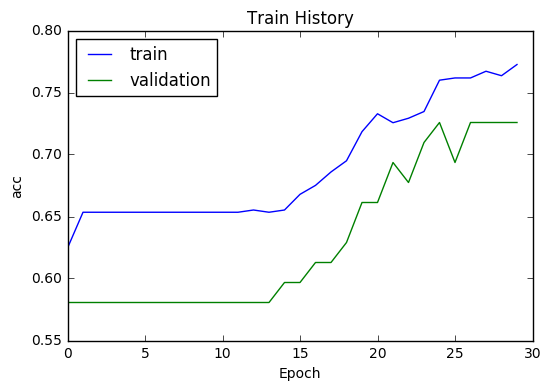

In [77]:
show_train_history(train_history,'acc','val_acc')

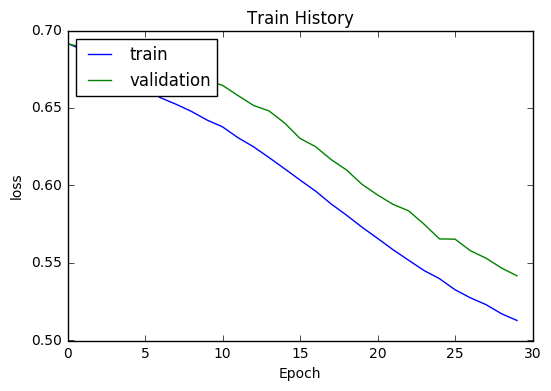

In [78]:
show_train_history(train_history,'loss','val_loss')

In [79]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

152/152 [==============================] - 0s 93us/step


In [80]:
scores[1]

0.7236842136634024